<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# Тема курсової роботи: **Оптимізація роботи ліфта**

Юдін Гліб, КМ-82  
Курсова робота з предмету "Методи оптимізації" на тему "Оптимізація роботи ліфта"  
Керівник: доктор фізико-математичних наук Норкін Богдан Володимирович

# Зміст

* Анотація
* Вступ
* Матеріали і методи 
* Розв'язання задачі 
  * Імпорт необхідних бібліотек
  * Визначення констант
  * Визначення функцій
  * Обчислення
  * Моделювання потоку пасажирів 
* Висновки
* Автори
* Використані джерела



# Анотація

В даній роботі розроблюється та реалізується алгоритм для вирішення, на який поверх повинен поїхати ліфт, застосовуючи методи з теорії оптимізації.

# Вступ


Ліфт став майже невід'ємною частиною життя більшості людей, що живуть у містах. Ним користуються у житлових будинках, в офісних, у торговельних центрах, у лікарнях, в університетах тощо. А тому постає питання в тому, щоб оптимізувати роботу ліфта (для того щоб люди не витрачали занадто довго часу на очікування ліфта та на саму поїздку). Оскільки у житлових будинках ліфт найчастіше їде або з першого поверху, або на перший поверх, то спеціально для такого режиму роботу було розроблено окремий алгоритм: спершу забирати пасажирів з найвищих поверхів, потім по дорозі вниз до 1-го поверху підбирати інших пасажирів. Якщо ж ліфт їде з першого поверху, то спочатку доставити усіх пасажирів з нижніх поверхів і вкінці -- з верхніх. Але в інших типах будівель (офіси, лікарні, торговельні центри тощо) режим роботи ліфта інший: він не так часто їде на 1-ий поверх, а частіше доставляє пасажирів на інші поверхи. А отже, алгоритм для житлових будинків тут буде неефективним. Таким чином, є потреба в розробці окремого алгоритму, за яким ліфт працював би ефективніше, ніж у житлових будинках. Будемо розглядати такий ліфт, при виклику якого вводиться номер поверху, на який треба доставити пасажира (тобто ліфт завчасно знає, з якого поверху і на який треба поїхати, що дозволить йому одразу прокласти оптимальний маршрут). Такі ліфти поки не набули популярності, але, можливо, це тому, що ще не було розроблено ефективних алгоритмів для них. Для реалізації цього завдання застосуємо знання і навички з теорії оптимізації.

# Матеріали і методи 

Насамперед, оскільки це задача оптимізації, необхідно вирішити, що саме буде оптимізуватися та за допомогою чого (тобто необхідно визначити незалежні змінні, цільову функцію та обмеження). Логічно, що необхідно оптимізувати час (бо треба доставити усіх пасажирів якомога швидше), а в якості незалежних змінних обрати поверхи, на які повинен поїхати ліфт. Але виникає ряд проблем, що потребують вирішення:
* який саме час слід оптимізувати? Час роботи ліфта, сумарний/середній/максимальний час поїздки усіх пасажирів, час очікування на ліфт?
* поверхи -- це цілі числа, тож які методи ліпше підійдуть для такого типу даних?
* не всі комбінації поверхів можна вважати коректними: наприклад, ліфт не може висадити пасажира, якого ще не забрав, або забрати пасажира, якщо в ліфті вже знаходиться максимально дозволена кількість людей. Як із цим працювати?


Було складено наступні об'єкти для формалізації даної задачі:
* n -- кількість пасажирів, яких необхідно доставити
* x -- вектор невідомих, а саме -- номерів поверхів, на які повинен поїхати ліфт. Оскільки кожен з n пасажирів відправляється з одного поверху на інший, то вектор х має розмірність 2n
* $x^{(j)}$ -- j-тий поверх з послідовності поверхів (j-тий елемент вектора х)
* $x^{(0)}$ -- поверх, з якого ліфт починає роботу
* s -- час, за який ліфт проїжджає один поверх
* $a_i, b_i$ -- поверх, з якого і на який вирушає і-тий пасажир
* $t_i$ -- скільки часу вже чекає і-тий пасажир
* задача оптимізації -- мінімізувати функцію $f(x) = s \sum_{j=1}^{2n}|x^{(j)} - x^{(j-1)}|$ -- загальний час роботи ліфта (бо $s\:|x^{(j)} - x^{(j-1)}|$ -- це час, який ліфт витрачає на поїздку з попереднього поверха на наступний). Логіка була наступною: чим менше загальний час роботи ліфта, тим менше час поїздки кожного пасажира окремо. Ця функція є унімодальною, тож із нею можна працювати, її точка мінімуму -- для всіх j $x^{(j)} = x^{(0)}$.
* p -- рекомендований час, за який пасажир має дочекатися ліфта
* q -- рекомендований час, який пасажир має загалом витратити (це включає час очікування ліфта та самої поїздки)
* r -- час зупинки ліфта (тобто час на те, щоб висадити пасажирів і забрати нових)
* обмеження доволі громіздкі, тому не будемо їх записувати. Було складено три обмеження: обмеження часу очікування на ліфт, обмеження на загальний витрачений час (нерівності) та обмеження цілочисельності змінних і коректності послідовності поверхів (рівності нулю).

Для знаходження точки мінімуму було обрано метод штрафних функцій, а саме -- метод зовнішньої точки з використанням методу Нелдера-Міда. Але після реалізації цього алгоритму виникла наступна проблема: через наявність обмежень штрафна функція виявилася неунімодальною, а отже, вона застрягала в локальному мінімумі. І справді, припустимо, що алгоритм повернув послідовність поверхів 2-4-6-8. Якщо ми збільшимо чи зменшимо будь-який її член, то отримаємо некоректну послідовність (наприклад, 1-4-6-8 некоректна, бо жоден пасажир не їде з 1-го поверху/на 1-ий поверх). Більше того, цілком можливо, що на деякому етапі алгоритму виявиться, що допустимої області взагалі не існує (якщо так склалося, що деякий пасажир чекає ліфт довше, ніж p секунд). Тож було вирішено відмовитися від даного методу та розглянути задачу як задачу цілочисельної оптимізації (а точніше -- комбінаторної, бо ми розглядаємо перестановки поверхів). Це дасть ліпший результат, оскільки ми будемо обирати оптимальну послідовність з множини вже дозволених послідовностей поверхів.

-------------------------------

Комбінаторні задачі є дуже складними у плані затрат обчислювальних ресурсів. В даній роботі необхідно знайти оптимальну перестановку з 2n поверхів, а таких перестановок існує (2n)!. Навіть для невеликої кількості пасажирів кількість перестановок буде дуже великою: при n = 5 перестановок буде 10! = 3628000. Тому варто скористатися спеціальними методами і алгоритмами.  Загалом методи оптимізації цілочисельних задач розділяють на три типи: 
1. методи звичайного нелінійного програмування, в яких отриманий розв'язок округлюється до цілих значень (цей варіант вже було використано, причому не успішно)
2. точні методи -- знаходять точний розв'язок. До них належать методи Гоморі та метод гілок і меж
3. еврістичні методи -- знаходять наближений розв'язок, але за значно менший час

Було вирішено розробити метод, який поєднує в собі ідею точного методу (а саме -- методу гілок і меж) та прийоми еврістичних методів (а саме -- ідею жадібного алгоритму). Суть методу гілок і меж (в даній роботі) полягає в розбитті множини усіх перестановок поверхів на окремі підмножини: ті, які містять деякий поверх на j-тій позиції (j = 1...2n) і які не містять. Для кожної такої підмножини оцінюється нижня межа цільової функції, а неконкурентноспроможні гілки відкидаються (що дозволяє не перебирати усі перестановки поверхів). Питання в тому, який саме поверх обрати -- тут використовується ідея жадібного алгоритму. Загалом вона полягає в тому, щоб на кожному кроці обирати варіант, який є оптимальним саме для цього кроку і який дає найліпший результат саме на цьому кроці. В контексті даного проєкту це означає наступне: нехай з k доступних поверхів треба обрати найліпший, на який далі поїде ліфт. Перебираємо усі k поверхів; нехай зараз розглядається і-тий поверх. Для кожного пасажира припускаємо, що після цього і-того поверху ліфт поїде на потрібний пасажиру поверх. Далі обчислюємо нижню межу цільової функції для кожного пасажира окремо, а потім -- для всіх пасажирів разом. Обираємо той поверх, де отримане значення найменше.

Щодо цільових функцій: оскільки тепер усі незалежні змінні дискретні та метод оптимізації інший, то можна розглядати більш складні неунімодальні функції. Щоб позбутися обмежень на час очікування ліфта і на загальний витрачений час, їх можна врахувати в самій цільовій функції. Нехай необхідно мінімізувати час очікування на ліфт кожного пасажира, а також загальний витрачений час кожного пасажира. Оскільки пасажирів багато, а цільова функція одна, то від цих значень часу варто взяти середнє арифметичне або максимум. Окрім цього, необхідно в цільовій функції певним чином об'єднати час очікування і загальний час. Найпростіший спосіб -- додати ці два значення, але треба взяти до уваги, що зазвичай час очікування на ліфт менший, ніж загальний час, а отже, цей доданок матиме менший вплив на цільову функцію. Рішення -- помножити цей доданок на значення q/p. Таким чином, якщо час очікування ліфта -- p секунд, то після множення на коефіцієнт отримаємо p * q / p = q секунд -- тепер перший доданок має такий самий вплив, як і другий, що нам і потрібно. Отже, отримуємо наступну задачу оптимізації: 

$min f(x) = \underset{i}{max} \;|\; \underset{i}{mean} \: \left(s\dfrac{q}{p} \sum_{j=1}^{k: x^{(k)} = a_i} |x^{(j)} - x^{(j-1)}| \;+\; s \sum_{j=1}^{l: x^{(l)} = b_i} |x^{(j)} - x^{(j-1)}| \right)$

Значення у дужках -- це вартість для кожного пасажира. Вона складається з двох сум: перша -- це час очікування на ліфт, помножений на ваговий коефіцієнт. Друга -- це загальний витрачений час (тобто на очікування ліфта і на саму поїздку). Також необхідно врахувати, що послідовності поверхів мають бути коректними (не їхати туди, куди не треба) та не повинно бути перевантаження ліфта. Ще необхідно буде вирішити, яку ж саме агрегаційну функцію слід взяти: середнє чи максимум.



# Розв'язання задачі


Програму для знаходження оптимальної послідовності поверхів буде зручно оформити з застосуванням класів:

**Floor** -- поверх. Містить поля:
* **number** -- номер поверху 
* **from_bool** -- чи відправляються з цього поверху? True, якщо так, False, якщо на цей поверх їдуть, None, якщо це початковий поверх 

Містить методи: 
* **is_allowed** -- чи можна поїхати на цей поверх. Можна, якщо ліфт ще не перевантажено і якщо ліфт забирає декого з цього поверху або доставляє когось на цей поверх.

----


**Passenger** -- пасажир. Містить поля: 
* **inside_lift** -- чи знаходиться пасажир всередині ліфта? True/False
* **time_waiting** -- скільки часу пасажир очікує на ліфт
* **time_total** -- скільки часу загалом витратив пасажир
* **floor_from** -- поверх, з якого відправляється пасажир
* **floor_to** -- поверх, на який їде пасажир
* **cost** -- вартість для даного пасажира, що обчислюється на основі витраченого часу

Містить методи:
* **update_cost** -- вручну оновити вартість пасажира.

----

**Node** -- вузол графа обчислень (метод гілок і меж зручно зображати за допомогою графа, в якому кожен вузол -- це частина послідовності чи повна послідовність поверхів). Містить поля:
* **experiment** -- експеримент (про це пізніше)
* **current_floor** -- поверх, на якому зараз знаходиться ліфт
* **cost_lower_bound** -- нижня межа значення цільової функції для даної послідовності, що будується
* **available_floors** -- список поверхів, на які ще треба поїхати
* **passengers** -- список пасажирів, яких ще не доставили
* **floor_sequence** -- частина послідовності поверхів, яка вже побудована (і яку ми будемо доповнювати новими поверхами)
* **costs_of_arrived** -- список вартостей вже обслужених пасажирів
* **passengers_in_lift** -- список пасажирів, які зараз знаходяться в ліфті

Містить методи:
* **sort_floors** -- реалізує ідею жадібного алгоритму. Сортує поверхи за тим, як зміниться значення цільової функції, якщо ми оберемо даний поверх. Перший елемент цього списку -- найліпший, останній -- найгірший
* **build_best_sequence** -- маючи готовий початок послідовності і найліпший поверх на даний момент, продовжує будувати послідовність поверхів через рекурсію
* **main** -- збирає ці методи докупи. Спочатку знаходить найліпший поверх, потім будує повну послідовність з цим поверхом. Далі намагається побудувати послідовності з рештою поверхів і порівнює, чи стало ліпше.

----

**Experiment** -- об'єкт, що контролює весь процес побудови послідовності поверхів. Містить усі поля, які містить клас Node, а також:
* **mode** -- режим роботи, відповідає за тип агрегаційної функції в цільовій функції. Може бути "max" чи "mean"
* **best_cost** -- найменша вартість повної(!) послідовності поверхів на даний момент. За замовчуванням дорівнює нескінченності
* **start_time** -- час початку роботи алгоритму

Містить методи:
* **start** -- починає роботу алгоритму (створює перший вузол графа обчислень і запускає його функцію побудови послідовностей поверхів)

----

Опишемо, як саме працює алгоритм. Спочатку наша послідовність поверхів складається лише з початкового поверху, на якому знаходиться ліфт. Викликаємо функцію sort_floors. Вона перебирає усі доступні і дозволені поверхи, для кожного поверха і для кожного пасажира знаходить нижню межу вартості пасажира, потім обчислює середнє/максимум вартостей пасажирів і сортує поверхи за порядком зростання вартості. Далі функція build_best_sequence додає найліпший поверх у послідовність і оновлює дані кожного пасажира: його час очікування/загальний час, його вартість, чи зайшов він у ліфт, чи вийшов з ліфта, скільки тепер пасажирів у ліфті. Вона рекурсивно викликає сама себе і таким чином будує повну послідовність поверхів. Ми побудували послідовність з найліпшим поверхом, але цілком можливо, що використання інших поверхів дасть ліпший результат. Тому також будуємо інші послідовності і постійно перевіряємо, чи перевищує нижня межа вартості інших послідовностей вартість повної, готової послідовності поверхів. Якщо перевищує, то ця нова послідовність вже точно не стане ліпшою -- перестаємо її розглядати, переходимо до інших. Якщо ми побудували нову послідовність до кінця і її вартість виявилася меншою -- чудово, ми знайшли ще ліпшу перестановку поверхів, зберігаємо її!

Алгоритм працює в режимі "max" швидше, ніж у режимі "mean", бо він може встановити, що послідовність не вигідна, ще до того, як послідовність добудується до кінця (наприклад, якщо максимум чотирьох додатних чисел перевищує деяке значення, то максимум з шести чисел також буде перевищувати). Гірша ситуація з методом "mean", оскільки він вимушений будувати всі послідовності до кінця -- а отже, фактично виконувати повний перебір усіх можливих перестановок, що дуже довго. Рішення -- зупинити роботу алгоритму через деякий час після початку роботи. Отриманий розв'язок може не бути оптимальним, але, в силу застосування жадібного алгоритму, бути близьким до оптимального.






----

## Імпорт необхідних бібліотек

In [1]:
import numpy as np
import itertools
import time
import random
import copy
import matplotlib.pyplot as plt

## Визначення констант

In [2]:
p = 20 # максимальний рекомендований час очікування ліфта
q = 80 # максимальний сумарний рекомендований час очікування ліфта та поїздки
x_0 = 10 # поверх, з якого ліфт починає роботу
s = 1 # час, за який ліфт проїжджає один поверх, сек
r = 4 # час зупинки ліфта на поверсі
response_time = 0.5 # час, за який алгоритм має повернути відповідь
lift_capacity = 5 # скільки людей може витримати ліфт

## Визначення функцій

In [3]:
class Passenger():
    def __init__(self, inside_lift, time_waiting, time_total, floor_from, floor_to):
        self.inside_lift = inside_lift
        self.time_waiting = time_waiting
        self.time_total = time_total
        self.floor_from = floor_from
        self.floor_to = floor_to
        self.cost = q / p * time_waiting + time_total

    def __repr__(self):
        return f"Passenger <inside_lift={self.inside_lift}; time=[{self.time_waiting}, {self.time_total}]; floors=[{self.floor_from.number}, {self.floor_to.number}], cost={self.cost}>"

    def update_cost(self):
        self.cost = q / p * self.time_waiting + self.time_total





class Floor():
    def __init__(self, number, from_bool):
        self.number = number
        self.from_bool = from_bool # True, якщо їдуть з цього поверха; False, якщо їдуть на цей поверх; 
        # None, якщо стартуємо з цього поверху

    def __repr__(self):
        if self.from_bool == None:
            return f"Floor <{self.number}; start>"
        return f"Floor <{self.number}; {'from' if self.from_bool else 'to'}>"

    def is_allowed(self, node):
        # знаходимо пасажирів, які їдуть на поверх floor і вже в ліфті
        # якщо таких нема -- на цей поверх не можна їхати
        passengers = list(filter(lambda passenger: passenger.floor_to == self and passenger.inside_lift or
            passenger.floor_from == self and not passenger.inside_lift, node.passengers))
        if not passengers:
            return False
        
        # якщо ліфт хоче забрати пасажира, а в ньому максимальна кількість людей -- на цей поверх їхати не можна
        passengers = list(filter(lambda passenger: passenger.floor_from == self, node.passengers))
        if passengers and node.passengers_in_lift == lift_capacity:
            return False
        return True

In [4]:
class Node():

    def __init__(self, experiment, current_floor, cost_lower_bound, available_floors, passengers, floor_sequence, passengers_in_lift=None, costs_of_arrived=None):
        self.experiment = experiment
        self.current_floor = current_floor
        self.cost_lower_bound = cost_lower_bound
        self.available_floors = available_floors
        self.passengers = passengers
        self.floor_sequence = floor_sequence
        self.costs_of_arrived = [] if costs_of_arrived == None else costs_of_arrived
        self.passengers_in_lift = passengers_in_lift if passengers_in_lift != None else len(
            list(filter(lambda passenger: passenger.inside_lift, self.passengers))
        )

    # 1. обрати найліпший поверх
    def sort_floors(self):
        max_costs_for_step = []
        for floor in self.available_floors:
            # на цей поверх можна поїхати? можна, якщо:
            # - пасажир їде з цього поверху і його ще нема в ліфті АБО; 
            # - пасажир їде на цей поверх і він вже в ліфті
            # - ліфт не перевантажено
            if not floor.is_allowed(self):
                continue
            # для кожного пасажира з'ясувати, скільки часу мине, якщо одразу після обраного поверху 
            # поїхати на потрібний пасажиру поверх
            # додати до загального часу час на поїздку між current_floor і floor (time_1) та 
            # час на поїздку між floor і passenger.floor (time_2)
            costs_for_step = []
            time_1 = s * abs(self.current_floor.number - floor.number)
            for passenger in self.passengers:
                if not passenger.inside_lift and floor != passenger.floor_from:
                    time_2 = s * abs(floor.number - passenger.floor_from.number) + r * (floor.number != passenger.floor_from.number)
                    cost_for_step = passenger.cost + q / p * (time_1 + time_2) + time_1 + time_2
                elif not passenger.inside_lift and floor == passenger.floor_from:
                    time_2 = s * abs(floor.number - passenger.floor_to.number)
                    cost_for_step = passenger.cost + q / p * time_1 + time_1 + time_2
                elif passenger.inside_lift and floor != passenger.floor_to:
                    time_2 = s * abs(floor.number - passenger.floor_to.number) + r * (floor.number != passenger.floor_to.number)
                    cost_for_step = passenger.cost + time_1 + time_2
                else:
                    time_2 = 0
                    cost_for_step = passenger.cost + time_1
                costs_for_step.append(cost_for_step)
            # з цих вартостей обираємо максимальну (а також зберігаємо поверх)
            if self.experiment.mode == "max":
                max_cost_for_step = max(costs_for_step)
            elif self.experiment.mode == "mean":
                max_cost_for_step = np.mean(costs_for_step)
            max_costs_for_step.append({"floor": floor, "cost": max_cost_for_step})
        # сортуємо поверхи за вартістю в порядку зростання
        max_costs_for_step.sort(key = lambda dct: dct["cost"])
        sorted_floors = list(map(lambda dct: dct["floor"], max_costs_for_step))
        #print("best:", sorted_floors[0])
        return sorted_floors


    # 2. побудувати повну послідовність з цим поверхом, отримати саму послідовність та її вартість
    def build_best_sequence(self, best_floor):
        # спершу -- оновити час очікування кожного пасажира та видалити пасажира, що дістався пункту призначення
        passengers_in_lift = self.passengers_in_lift
        new_passengers = []
        new_available_floors = []
        costs = []
        new_cost = self.cost_lower_bound
        for passenger in self.passengers:
            # з'ясовуємо значення поля inside_lift
            # якщо пасажир заходить у ліфт -- змінюємо поле inside_lift
            if not passenger.inside_lift and passenger.floor_from == best_floor:
                inside_lift = True
                passengers_in_lift += 1
            else:
                inside_lift = passenger.inside_lift

            # з'ясовуємо час очікування та загальний час
            time_for_stop = r * (self.current_floor.number != best_floor.number)
            add_time = s * abs(self.current_floor.number - best_floor.number) + time_for_stop
            if best_floor == passenger.floor_to:
                add_time -= time_for_stop
            if not passenger.inside_lift:
                time_waiting = passenger.time_waiting + add_time
                time_total = passenger.time_total + add_time
            else:
                time_waiting = passenger.time_waiting
                time_total = passenger.time_total + add_time 

            # оновлюємо дані про пасажира (для цього створюємо новий інстанс класу Passenger)
            new_passenger = Passenger(inside_lift, time_waiting, time_total, passenger.floor_from, passenger.floor_to)
            cost = new_passenger.cost
            costs.append(cost)

            # якщо пасажир доїхав до свого поверху -- більше не розглядаємо його
            if best_floor == passenger.floor_to:
                passengers_in_lift -= 1
                if self.experiment.mode == "mean":
                    costs.remove(cost)
                    self.costs_of_arrived.append(cost)
            
            else:
                new_passengers.append(new_passenger)

            #old_floor_from = passenger.floor_from
            #new_floor_from = Floor(old_floor_from.number, new_passenger, old_floor_from.from_bool)
            #old_floor_to = passenger.floor_to
            #new_floor_to = Floor(old_floor_to.number, new_passenger, old_floor_to.from_bool)
            #new_passenger.floor_from = new_floor_from
            #new_passenger.floor_to = new_floor_to
            #new_passengers.append(new_passenger)
            #new_available_floors.extend([new_floor_from, new_floor_to])

        # з отриманих вартостей знаходимо максимум чи середнє
        if self.experiment.mode == "max":
            cost = max(costs)
        elif self.experiment.mode == "mean":
            costs.extend(self.costs_of_arrived)
            cost = np.mean(costs)
        # оновлюємо верхню межу вартості
        if cost >= new_cost:
            new_cost = cost
        # якщо дана послідовність вже дає гірший результат, ніж якась інша послідовність, -- зупиняємось (це діє тільки для режиму max; )
        if self.experiment.mode == "max" and new_cost > self.experiment.best_cost:
            #print("not good enough, going back. sequence =", self.floor_sequence + [best_floor], "cost =", new_cost)
            return None, None

        new_available_floors = self.available_floors.copy()
        new_available_floors.remove(best_floor)

        next_node = Node(
            self.experiment,
            best_floor, # новий поточний поверх
            new_cost,
            new_available_floors, # список поверхів без найліпшого поверха
            new_passengers,
            self.floor_sequence + [best_floor],
            passengers_in_lift,
            self.costs_of_arrived
        )
        best_sequence, cost_of_best_sequence = next_node.main()
        return best_sequence, cost_of_best_sequence

    


    def main(self):
        # 1. якщо доступних поверхів не залишилось -- доставили останнього пасажира
        # повертаємо повну послідовність поверхів та її вартість
        if not self.available_floors:
            if self.cost_lower_bound <= self.experiment.best_cost:
                self.experiment.best_cost = self.cost_lower_bound
            #print(self.floor_sequence, self.cost_lower_bound)
            #print("best so far! sequence =", self.floor_sequence, "cost =", Node.best_cost)
            return self.floor_sequence, self.cost_lower_bound

        # 2. обрати найліпший поверх
        sorted_floors = self.sort_floors()
        if len(sorted_floors) == 0:
            return None, None
        best_floor = sorted_floors.pop(0)

        # 3. будуємо повну послідовність з цим поверхом
        best_sequence, cost_of_best_sequence = self.build_best_sequence(best_floor)
        # через response_time секунд програма має завершити роботу
        if time.time() - self.experiment.start_time > response_time:
            return best_sequence, cost_of_best_sequence

        # 4. будуємо повні послідовності з іншими поверхами, якщо вони ліпші -- зберігаємо
        for floor in sorted_floors:
            other_sequence, other_cost = self.build_best_sequence(floor)
            if other_cost != None and (cost_of_best_sequence == None or other_cost <= cost_of_best_sequence):
                best_sequence, cost_of_best_sequence = other_sequence, other_cost

        return best_sequence, cost_of_best_sequence

        


In [5]:
class Experiment():

    def __init__(self, mode, start_floor, cost_lower_bound, available_floors, passengers, floor_sequence):
        self.start_floor = start_floor
        self.mode = mode
        self.cost_lower_bound = cost_lower_bound
        self.available_floors = available_floors
        self.passengers = passengers
        self.floor_sequence = floor_sequence
        self.best_cost = float("inf")
        self.start_time = time.time()

    def start(self):
        first_node = Node(self, self.start_floor, self.cost_lower_bound, self.available_floors, self.passengers, self.floor_sequence)
        return first_node.main()

## Обчислення

Тепер покажемо, як алгоритм працює на практиці. Нехай у нас є 5 пасажирів, вони їдуть з різних поверхів на різні поверхи, кожен із пасажирів вже чекає на ліфт певну кількість секунд. Спочатку запустимо наш розроблений алгоритм, а потім просто виконаємо повний перебір усіх перестановок та виведемо послідовність з найменшою вартістю. Порівняємо вартості знайдених послідовностей та час роботи алгоритмів.

In [6]:
floor1 = Floor(8, True) # з 8-го поверху на 3-й
floor2 = Floor(3, False)
passenger1 = Passenger(False, 0, 0, floor1, floor2) # чекає вже 0 секунд

floor3 = Floor(2, True)
floor4 = Floor(7, False)
passenger2 = Passenger(False, 0, 0, floor3, floor4)

floor5 = Floor(2, True)
floor6 = Floor(6, False)
passenger3 = Passenger(False, 0, 0, floor5, floor6)

floor7 = Floor(1, True)
floor8 = Floor(8, False)
passenger4 = Passenger(False, 0, 0, floor7, floor8)

floor9 = Floor(2, True)
floor10 = Floor(8, False)
passenger5 = Passenger(False, 16, 16, floor9, floor10)

current_floor = Floor(8, None) # ліфт знаходиться на 8-му поверсі

start_time = time.time()
experiment = Experiment("mean", current_floor, 0, [floor1, floor2, floor3, floor4, floor5, floor6, floor7, floor8, floor9, floor10], [passenger1, passenger2, passenger3, passenger4, passenger5], [current_floor])
print(experiment.start())
print("\nTime: {:.3f} sec".format(time.time() - start_time))

([Floor <8; start>, Floor <8; from>, Floor <2; from>, Floor <2; from>, Floor <2; from>, Floor <1; from>, Floor <3; to>, Floor <6; to>, Floor <8; to>, Floor <8; to>, Floor <7; to>], 80.0)

Time: 0.504 sec


In [7]:
# повний перебір
floors = [floor1, floor2, floor3, floor4, floor5, floor6, floor7, floor8, floor9, floor10]
passengers = [passenger1, passenger2, passenger3, passenger4, passenger5]
all_sequences = itertools.permutations(floors)
results = []

start_time = time.time()
for sequence in all_sequences:
    costs = []
    correct_sequence = True
    for passenger in passengers:
        prev_floor = current_floor
        entered = False
        exited = False
        time_waiting = passenger.time_waiting
        time_total = passenger.time_total
        for floor in sequence:

            add_time = s * abs(floor.number - prev_floor.number) + r * (prev_floor.number != floor.number)
            if not entered:
                time_waiting += add_time
                time_total += add_time
            else:
                time_total += add_time

            if floor == passenger.floor_from and not entered:
                entered = True
            elif floor == passenger.floor_to and entered:
                exited = True
                time_total -= r * (prev_floor.number != floor.number)
                break

            prev_floor = floor

        # якщо пасажир не дістався до свого поверху -- послідовність некоректна
        if not exited:
            correct_sequence = False
            break
        # інакше обчислюємо вартість для кожного пасажира, зберігаємо найбільшу
        cost = q / p * time_waiting + time_total
        costs.append(cost)
    
    # знаходимо максимальну вартість -- це і буде вартість для всієї послідовності
    if correct_sequence:
        #max_cost = max(costs)
        max_cost = np.mean(costs)
        results.append({"sequence": sequence, "max_cost": max_cost})
        #print({"sequence": sequence, "max_cost": max_cost})

min_max_cost = min([dct["max_cost"] for dct in results])
best_sequences = list(filter(lambda dct: dct["max_cost"] == min_max_cost, results))

#for elem in best_sequences:
#    print(elem)
print(best_sequences[0])
print("\nTime: {:.3f} sec".format(time.time() - start_time))
    

{'sequence': (Floor <8; from>, Floor <2; from>, Floor <2; from>, Floor <2; from>, Floor <1; from>, Floor <3; to>, Floor <6; to>, Floor <8; to>, Floor <8; to>, Floor <7; to>), 'max_cost': 80.0}

Time: 58.020 sec


## Моделювання потоку пасажирів

Бачимо, що обидва алгоритми повернули ідентичні послідовності, причому розроблений алгоритм зміг це зробити за пів секунди, а повний перебір -- за 50 секунд (причому він також відкидав послідовності, які є некоректними, інакше це зайняло би ще більше часу). Але в реальності частіше мають справу з потоком пасажирів: нові пасажири з'являються постійно з випадковим інтервалом часу, навіть коли попередні пасажири ще не доїхали до свого поверху. Щоб продемонструвати, як алгоритм порається з потоком пасажирів (коли при появі нових пасажирів треба заново будувати послідовність поверхів), напишемо окрему функцію, яка буде моделювати потік пасажирів з заданим інтервалом часу. Це також допоможе порівняти роботу алгоритму в режимах "max" і "mean".

Функція **lift_modeler** прийматиме наступні значення:
* **passengers_num** -- кількість пасажирів, з яких складається потік
* **floors_num** -- кількість поверхів у будинку
* **interval_time** -- інтервал часу між появами нових пасажирів
* **build_sequence_func** -- функція для отримання оптимальної послідовності поверхів для заданих пасажирів.

Також для зручності роботи доповнимо клас Passenger наступними полями:
* **abs_time_start** -- момент часу (від початку роботи ліфта), коли пасажир викликає ліфт
* **abs_time_depart** -- момент часу, коли пасажир заходить у ліфт
* **abs_time_arriv** -- момент часу, коли пасажир виходить з ліфта

Принцип роботи функції lift_modeler: спочатку генеруються passengers_num пасажирів з випадковими поверхами відправлення і призначення, а також початковий поверх. Створюємо окремі списки для відстеження пасажирів, що ще не викликали ліфт; пасажирів, які зараз обслуговуються; пасажирів, яких вже доставили. На початку роботи алгоритму момент часу рівний нулю, а обслуговується лише перший пасажир з потоку. Будуємо повну послідовність поверхів для всіх пасажирів, що зараз обслуговуються. Далі проходимо по цій послідовності і оновлюємо дані кожного пасажира (витрачений час, в ліфті чи ні). Паралельно перевіряємо, чи настав час для появи нового пасажира. Якщо ні -- продовжуємо перебирати послідовність поверхів. Якщо так -- чекаємо, коли ліфт доїде до наступного поверху, оновлюємо дані про пасажирів, додаємо цього нового пасажира до розгляду. Повторюємо попередні дії (знову будуємо нову послідовність поверхів), поки не доставимо всіх пасажирів.

Викличемо цю функцію разом з методами "max" і "mean", для кожного методу отримаємо список пасажирів (з часом очікування ліфта та загальним витраченим часом) та остаточну послідовність поверхів, за якою рухався ліфт. Побудуємо графіки того, скільки часу витратив кожен пасажир (вимірюватимемо як час очікування на ліфт, так і загальний час). Нам необхідно, щоб час очікування не перевищував p секунд, а загальний час -- q секунд (а якщо й перевищував, то не сильно).

In [8]:
class PassengerExtended(Passenger):
    def __init__(self, inside_lift, time_waiting, time_total, floor_from, floor_to, abs_time_start, abs_time_depart, abs_time_arriv):
        super().__init__(inside_lift, time_waiting, time_total, floor_from, floor_to)
        self.abs_time_start = abs_time_start
        self.abs_time_depart = abs_time_depart
        self.abs_time_arriv = abs_time_arriv

    def __repr__(self):
        return f"Passenger <inside_lift={self.inside_lift}; relative_time=[{self.time_waiting}, {self.time_total}]; floors=[{self.floor_from.number}, {self.floor_to.number}], cost={self.cost}, absolute_time=[{self.abs_time_start}, {self.abs_time_depart}, {self.abs_time_arriv}]>"

In [9]:
def optimized_algorithm(mode, start_floor, cost_lower_bound, available_floors, passengers, floor_sequence):
    # Функція, яка будує послідовність поверхів
    experiment = Experiment(mode, start_floor, cost_lower_bound, available_floors, passengers, floor_sequence)
    sequence = experiment.start()[0]
    return sequence



def lift_modeler(passengers_num, floors_num, interval_time, build_sequence_func, **kwargs):
    # Функція для моделювання роботи ліфта за заданим алгоритмом
    # passengers_num -- кількість пасажирів
    # floors_num -- кількість поверхів у будинку
    # interval_time -- середный проміжок часу між генерацією нових пасажирів
    # build_sequence_func -- функція для отримання послідовності поверхів

    # спочатку генеруємо пасажирів
    abs_time = 0
    start_floor = Floor(np.random.randint(1, floors_num+1), None)
    floors_combinations = list(itertools.permutations(range(1, floors_num+1), 2))
    passengers_not_served = []
    passengers_being_served = []
    passengers_arrived = []
    floors = []
    ultimate_sequence = [start_floor]
    abs_time_start = 0
    for i in range(passengers_num):
        pair_of_floors = random.choice(floors_combinations)
        floor_1 = Floor(pair_of_floors[0], True)
        floor_2 = Floor(pair_of_floors[1], False)
        floors.append(floor_1)
        floors.append(floor_2)
        #passenger = PassengerExtended(False, 0, 0, floor_1, floor_2, interval_time * i, None, None)
        if i == 0:
            passenger = PassengerExtended(False, 0, 0, floor_1, floor_2, 0, None, None)
        else:
            passenger = PassengerExtended(False, 0, 0, floor_1, floor_2, abs_time_start, None, None)
        abs_time_start += np.random.exponential(interval_time)
        passengers_not_served.append(passenger)
    # перші пасажири, які вже викликали ліфт
    new_passengers = list(filter(lambda passenger: passenger.abs_time_start <= abs_time, passengers_not_served))
    passengers_being_served.extend(new_passengers)
    passengers_not_served = [passenger for passenger in passengers_not_served if passenger not in passengers_being_served]


    # поки не доставили всіх пасажирів
    while len(passengers_arrived) != passengers_num:        

        # 1. побудувати нову послідовність поверхів, проходити по цій послідовності, поки новий пасажир не викличе ліфт
        kwargs["start_floor"] = start_floor
        kwargs["available_floors"] = [passenger.floor_from for passenger in passengers_being_served if not passenger.inside_lift] + [
                                      passenger.floor_to for passenger in passengers_being_served]
        kwargs["floor_sequence"] = [start_floor]
        kwargs["passengers"] = passengers_being_served.copy()
        sequence = build_sequence_func(**kwargs)

        for i in range(1, len(sequence)):
            floor, prev_floor = sequence[i], sequence[i-1]
            ultimate_sequence.append(floor)
            time_between_floors = s * abs(floor.number - prev_floor.number) + r * (floor.number != prev_floor.number)
            abs_time += time_between_floors

            # 2. оновлювати інформацію про пасажирів до того моменту, поки не з'явиться новий пасажир
            for passenger in passengers_being_served:
                # якщо пасажир ще не в ліфті або тільки заходить у ліфт
                if not passenger.inside_lift:
                    passenger.time_waiting += time_between_floors
                    passenger.time_total += time_between_floors
                    # якщо пасажир заходить у ліфт
                    if passenger.floor_from == floor:
                        passenger.inside_lift = True
                        passenger.abs_time_depart = abs_time
                # якщо ж пасажир у ліфті
                else:
                    passenger.time_total += time_between_floors
                    # якщо пасажир виходить з ліфта
                    if passenger.floor_to == floor:
                        passenger.time_total -= r * (floor.number != prev_floor.number)
                        passenger.inside_lift = False
                        passenger.abs_time_arriv = abs_time - r * (floor.number != prev_floor.number)
                        passengers_being_served.remove(passenger)
                        passengers_arrived.append(passenger)
                passenger.update_cost()

            # 3. якщо нові пасажири викликали ліфт
            new_passengers = list(filter(lambda passenger: passenger.abs_time_start <= abs_time, passengers_not_served))
            if new_passengers:
                for new_passenger in new_passengers:
                    # оновити час, додати в список пасажирів, що обслуговуються
                    passengers_not_served.remove(new_passenger)
                    passengers_being_served.append(new_passenger)
                    new_passenger.time_waiting += abs_time - new_passenger.abs_time_start
                    new_passenger.time_total += abs_time - new_passenger.abs_time_start
                    start_floor = copy.deepcopy(floor)
                    start_floor.from_bool = None
                break


    return {"passengers": passengers_arrived, "sequence": ultimate_sequence}



In [10]:
def compare_methods(passengers_num, floors_num, interval_time, 
    p, q, s, r, response_time, lift_capacity):

  fix, axs = plt.subplots(2, figsize=(30, 15))

  # for reproducibility
  np.random.seed(29)
  random.seed(29)

  modes = ("mean", "max")
  for i in range(len(modes)):
      mode = modes[i]
      print("mode:", mode)

      result = lift_modeler(passengers_num, floors_num, interval_time, 
                            optimized_algorithm, mode=mode, cost_lower_bound=0)
      passengers = result["passengers"]
      passengers.sort(key = lambda passenger: passenger.abs_time_start)
      sequence = result["sequence"]
      #for floor in sequence:
      #   print(floor)
      #for passenger in passengers:
      #   print(passenger)
      print("mean waiting time:", np.mean([passenger.time_waiting for passenger in passengers]))
      print("max waiting time:", max([passenger.time_waiting for passenger in passengers]))
      print("mean total time:", np.mean([passenger.time_total for passenger in passengers]))
      print("max total time:", max([passenger.time_total for passenger in passengers]))
      print()

      # будуємо графіки
      j = 0 # номер пасажира
      for passenger in passengers:
          # спочатку відображаємо час очікування на ліфт
          if passenger.time_waiting <= p:
              axs[i].plot((passenger.abs_time_start, passenger.abs_time_depart), (j, j), "g-")
          else:
              axs[i].plot((passenger.abs_time_start, passenger.abs_time_start + p), (j, j), "g-")
              axs[i].plot((passenger.abs_time_start + p, passenger.abs_time_depart), (j, j), "r-")
          axs[i].plot(passenger.abs_time_depart, j, "go")
          # а далі -- час загальної поїздки
          if passenger.time_total <= q:
              axs[i].plot((passenger.abs_time_depart, passenger.abs_time_arriv), (j, j), "b-")
          elif passenger.time_waiting <= q:
              axs[i].plot((passenger.abs_time_depart, passenger.abs_time_start + q), (j, j), "b-")
              axs[i].plot((passenger.abs_time_start + q, passenger.abs_time_arriv), (j, j), "r-")
          else:
              axs[i].plot((passenger.abs_time_depart, passenger.abs_time_arriv), (j, j), "r-")
          j += 1

      axs[i].set_title(f"Mode: {mode}, p = {p}, q = {q}")


  plt.show()

mode: mean
mean waiting time: 27.89596361366445
max waiting time: 155.84644871395764
mean total time: 49.3531064708073
max total time: 170.84644871395764

mode: max
mean waiting time: 11.612720689456863
max waiting time: 22.65391588403351
mean total time: 31.469863546599722
max total time: 64.24758487433033



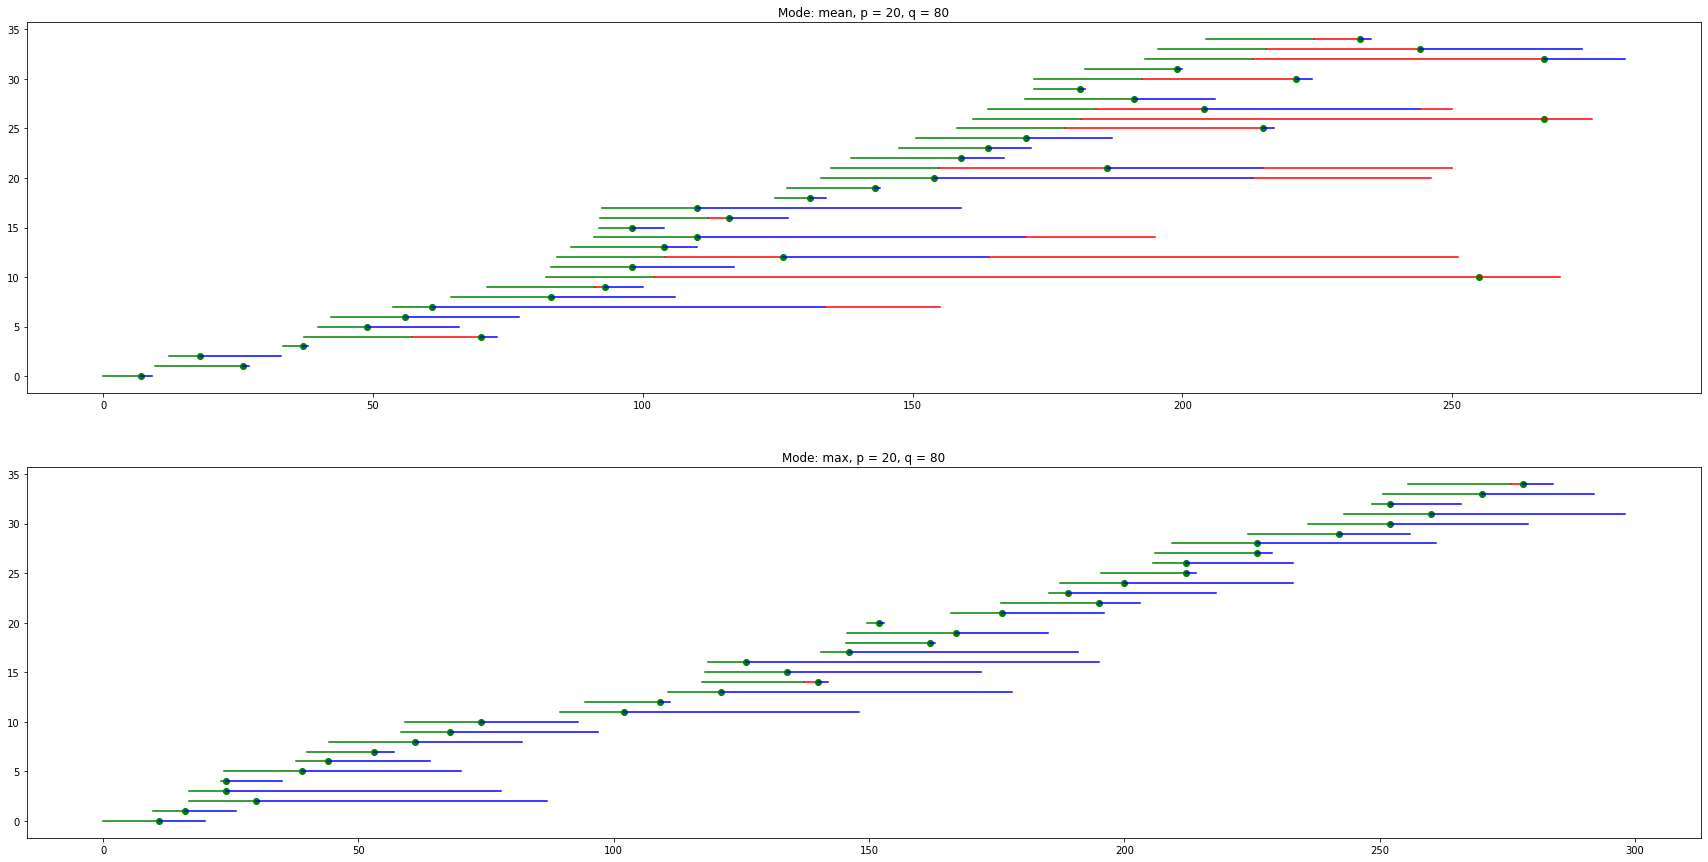

In [11]:
passengers_num = 35 # потік з 40-ка пасажирів 
floors_num = 9 # 9-поверховий будинок
interval_time = 6 # кожні 6 секунд новий пасажир викликає ліфт

p = 20 # максимальний рекомендований час очікування ліфта
q = 80 # максимальний сумарний рекомендований час очікування ліфта та поїздки
s = 1 # час, за який ліфт проїжджає один поверх, сек
r = 4 # час зупинки ліфта на поверсі
response_time = 0.5 # час, за який алгоритм має повернути відповідь
lift_capacity = 5 # кількість людей, яку може витримати ліфт

compare_methods(passengers_num, floors_num, interval_time, 
    p, q, s, r, response_time, lift_capacity)

Ці графіки слід інтерпретувати наступним чином: вісь Х -- це час від початку моделювання, вісь Y -- номер пасажира. Кожна горизонтальна лінія -- це окремий пасажир. Зелена лінія -- це час очікування ліфта, зелена крапка -- момент, коли ліфт забирає пасажира, синя лінія -- загальний витрачений час, червона лінія означає, що перевищено час очікування (якщо зліва від зеленої крапки), або загальний час (якщо справа від зеленої крапки), або все разом.

Загалом ми бачимо, що для заданих початкових умов (потік з 35-ти пасажирів, в середньому нові пасажири з'являються кожні 6 секунд) найліпше впорався режим "max": порушень обмежень майже не відбувалось, чого не можна сказати про режим "mean". Більш того, при режимі "mean" ліфт ігнорує деяких пасажирів, бо постійно розвозить інших. Але для інших початкових даних ми можемо отримати інші результати: збільшимо інтенсивність потоку, щоб нові пасажири з'являлися в середньому кожні 5 секунд, а потім -- кожні 4 секунди.

mode: mean
mean waiting time: 27.80854110662512
max waiting time: 154.53870726163137
mean total time: 47.06568396376798
max total time: 167.53870726163137

mode: max
mean waiting time: 15.267743431690244
max waiting time: 26.99264154448977
mean total time: 35.610600574547384
max total time: 91.03965406194195



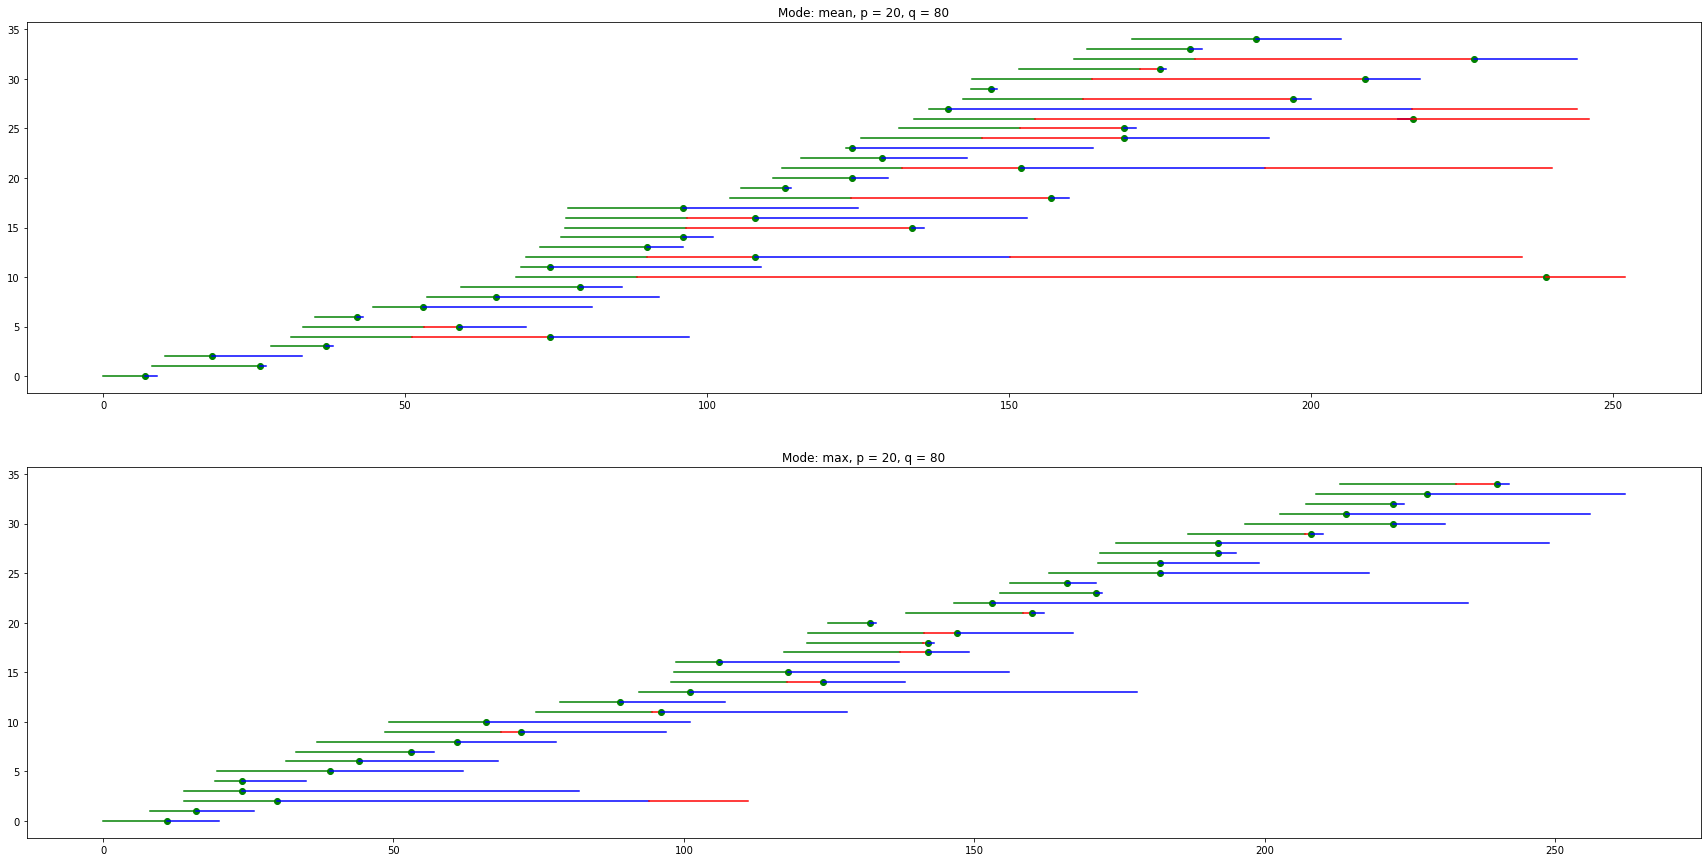

In [12]:
passengers_num = 35 # потік з 40-ка пасажирів 
floors_num = 9 # 9-поверховий будинок
interval_time = 5

p = 20 # максимальний рекомендований час очікування ліфта
q = 80 # максимальний сумарний рекомендований час очікування ліфта та поїздки
s = 1 # час, за який ліфт проїжджає один поверх, сек
r = 4 # час зупинки ліфта на поверсі
response_time = 0.5 # час, за який алгоритм має повернути відповідь
lift_capacity = 5 # кількість людей, яку може витримати ліфт

compare_methods(passengers_num, floors_num, interval_time, 
    p, q, s, r, response_time, lift_capacity)

mode: mean
mean waiting time: 40.03540431387154
max waiting time: 160.23096580930508
mean total time: 57.406832885300105
max total time: 171.49515585877856

mode: max
mean waiting time: 39.8084804596379
max waiting time: 101.5941132355918
mean total time: 65.63705188820933
max total time: 117.22309994907008



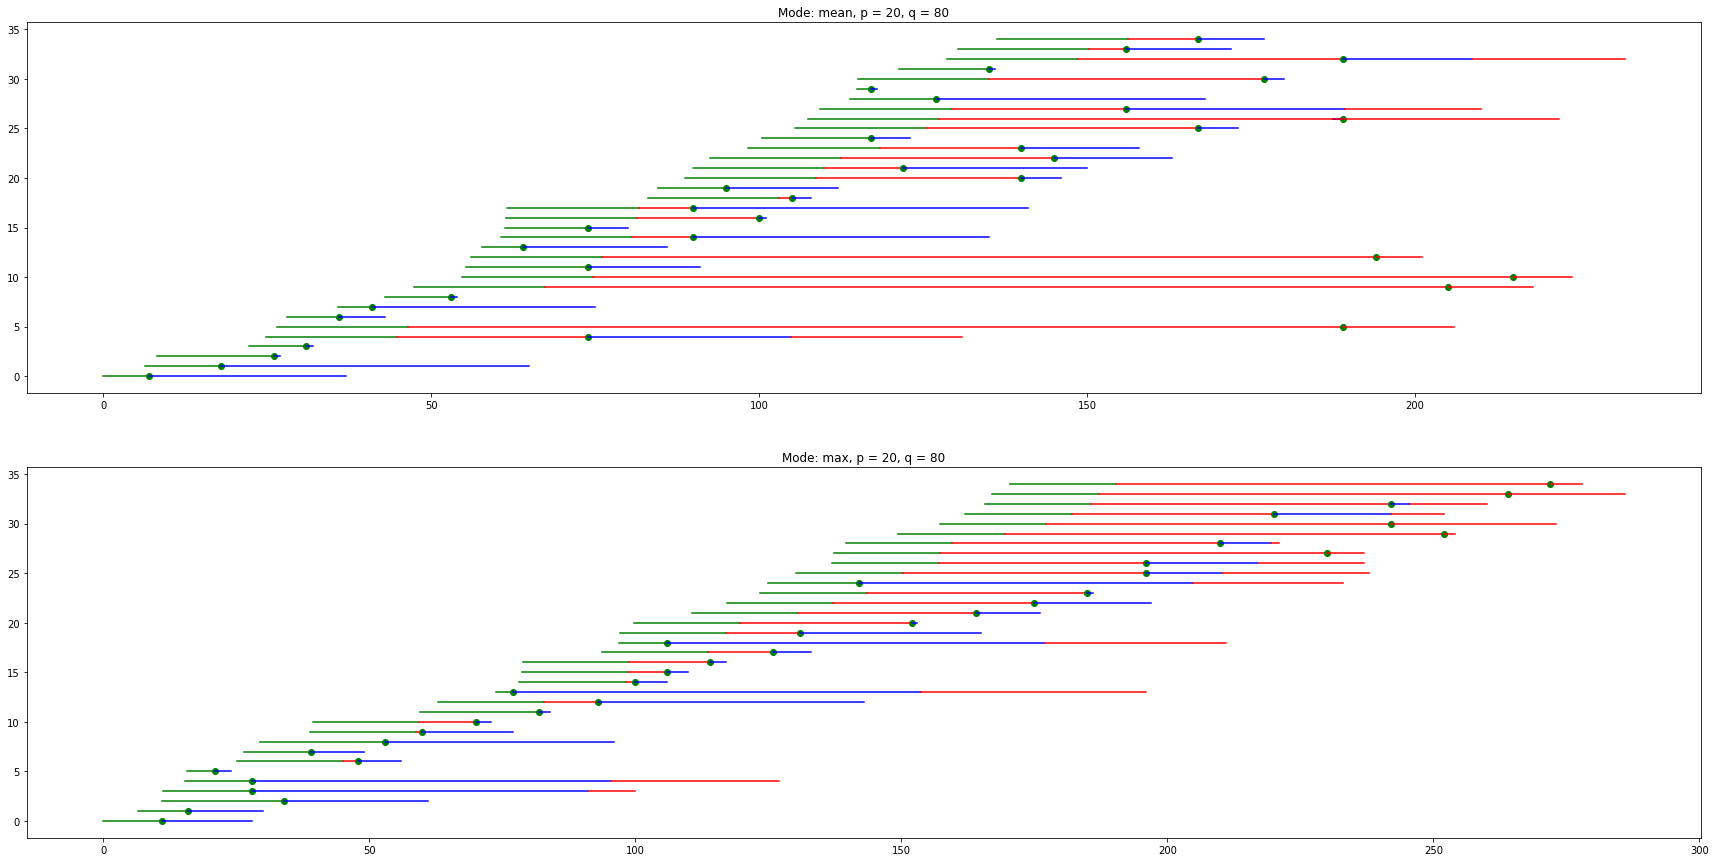

In [13]:
passengers_num = 35 # потік з 40-ка пасажирів 
floors_num = 9 # 9-поверховий будинок
interval_time = 4

p = 20 # максимальний рекомендований час очікування ліфта
q = 80 # максимальний сумарний рекомендований час очікування ліфта та поїздки
s = 1 # час, за який ліфт проїжджає один поверх, сек
r = 4 # час зупинки ліфта на поверсі
response_time = 0.5 # час, за який алгоритм має повернути відповідь
lift_capacity = 5 # кількість людей, яку може витримати ліфт

compare_methods(passengers_num, floors_num, interval_time, 
    p, q, s, r, response_time, lift_capacity)

Отримали наступні результати: для інтенсивності потоку $\lambda = 0.2$ (новий пасажир кожні 5 секунд) режим "max" все ще дає прийнятний результат, але для $\lambda = 0.25$ (новий пасажир кожні 4 секунди) ліфт в обох режимах перестає поратись з потоком пасажирів. Причому для режиму "max" (якщо пасажирів стає занадто багато) можна помітити наступну тенденцію: чим більше людей користуються ліфтом, тим довше вони чекатимуть на нього (у верхній половині графіка більше червоних ліній). Ця проблема менш помітна в режимі "mean", але натомість одні пасажири дістаються свого поверху дуже швидко, а інші -- дуже довго.

# Висновки

У ході виконання курсової роботи склали математичну модель задачі оптимізації роботи ліфта, а також намагалися розв'язати складену задачу різними методами. Переконалися, що найліпше працюють ті методи, які, власне, призначені для даного класу задач. Так, спочатку оптимальна послідовність поверхів шукалася звичайними методами нульового порядку (метод Нелдера-Міда, метод штрафних функцій), але вони не враховують усіх особливостей проблемної області. Конкретно в цій задачі вони не враховують, що змінні мають бути цілочисельними, що не кожну послідовність поверхів можна вважати коректною, що необхідно також слідкувати за завантаженістю ліфта. Звичайно, ці недоліки намагались бути виправленими, але це призвело до ускладнення задачі та виродження цільової функції (вона стала неунімодальною). Потім було вирішено використати методи цілочисельного (комбінаторного) програмування, причому алгоритм було складено не за одним методом -- алгоритм являє собою комбінацію різних методів і прийомів (метод гілок і меж, жадібний алгоритм). Тобто переконалися, що найліпший результат дають алгоритми, розроблені саме під задану конкретну задачу.

Було реалізовано розроблений алгоритм мовою Python, а також перевірено його роботу за допомогою повного перебору. Для п'ятьох пасажирів алгоритм видав той самий результат, що і повний перебір, причому зробив це у 100 разів швидше (а це особливо важливо, оскільки ця система має працювати в режимі реального часу). Також порівняли роботу алгоритму, якщо в цільовій функції використано функції максимуму та середнього значення. Якщо потік пасажирів не дуже інтенсивний (інтервал часу між появою нових пасажирів -- в середньому 5-6 секунд), то використання функції максимуму дає чудові результати, обмеження на час майже завжди виконуються. Але чим більше стає пасажирів, тим гірше ліфт порається зі своєю роботою (незалежно від методу). Один із можливих варіантів вдосконалення роботи алгоритму -- накладати на цільову функцію дуже жорсткий штраф, якщо пасажир чекає занадто довго (скажімо, 60 чи 100 секунд) -- в такому випадку ліфт обов'язкове поїде забирати до цих пасажирів, що витратили надто багато часу.



# Автори

[Юдін Гліб, КМ-82](https://github.com/hlib-yudin)

# Використані джерела

1. [*Albert Einstein Fernandes Muritiba.* Algorithms and Models For Combinatorial Optimization Problems. 2010.](https://core.ac.uk/download/pdf/11012814.pdf)
2. [*Luca Trevisan.* Combinatorial Optimization: Exact and Approximate Algorithms. Stanford University, 2011.](https://theory.stanford.edu/~trevisan/books/cs261.pdf)
3. [Combinatorial optimization -- Wikipedia.](https://en.wikipedia.org/wiki/Combinatorial_optimization)
4. [Integer optimization -- Wikipedia.](https://en.wikipedia.org/wiki/Integer_programming)
5. [*Austin G. Walters.* Everyday Algorithms: Elevator Allocation.](https://austingwalters.com/everyday-algorithms-elevator-allocation/)
6. [*Олег Борисенков.* Как работает лифт в небоскребах? Алгоритмы + задачи с собеседований.](https://tproger.ru/articles/kak-rabotaet-lift-v-neboskrebah-algoritmy-i-zadachi-s-sobesedovanij/)
7. [*Популярная механика.* Сложный алгоритм: как работают лифты.](https://www.popmech.ru/technologies/522444-slozhnyy-algoritm-kak-rabotayut-lifty/)